In [0]:
!pip install -q tf-nightly

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/CNN Homework/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/CNN Homework/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Using TensorFlow backend.


Found 16 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [4]:
classifier = tf.keras.Sequential()

classifier.add(layers.Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(layers.MaxPooling2D(pool_size = (2, 2)))
classifier.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(layers.MaxPooling2D(pool_size = (2, 2)))
classifier.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
classifier.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
Total params: 28,640
Trainable params: 28,640
Non-trainable params: 0
_________________________________________________________________


In [5]:
classifier.add(layers.Flatten())
classifier.add(layers.Dense(units = 128, activation = 'relu'))
classifier.add(layers.Dense(units = 1, activation = 'sigmoid'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [6]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(training_set,
              steps_per_epoch = 16,
              epochs = 10,
              validation_data = test_set,
              validation_steps = 20)

Epoch 1/10
16/16 [==============================] - 4s 225ms/step - loss: 0.3650 - accuracy: 0.8359 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 2/10
16/16 [==============================] - 4s 223ms/step - loss: 2.6343e-04 - accuracy: 1.0000 - val_loss: 3.0322e-07 - val_accuracy: 1.0000
Epoch 3/10
16/16 [==============================] - 4s 221ms/step - loss: 2.2218e-07 - accuracy: 1.0000 - val_loss: 6.7598e-09 - val_accuracy: 1.0000
Epoch 4/10
16/16 [==============================] - 4s 220ms/step - loss: 3.6562e-08 - accuracy: 1.0000 - val_loss: 3.6438e-09 - val_accuracy: 1.0000
Epoch 5/10
16/16 [==============================] - 3s 218ms/step - loss: 3.0448e-08 - accuracy: 1.0000 - val_loss: 3.2586e-09 - val_accuracy: 1.0000
Epoch 6/10
16/16 [==============================] - 3s 219ms/step - loss: 3.8250e-08 - accuracy: 1.0000 - val_loss: 3.1738e-09 - val_accuracy: 1.0000
Epoch 7/10
16/16 [==============================] - 4s 220ms/step - loss: 3.0031e-08 - accuracy: 1.0000 - va

In [7]:
test_loss, test_acc = classifier.evaluate(test_set, steps = 1)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)

1/1 [==============================] - 0s 2ms/step - loss: 3.0531e-09 - accuracy: 1.0000
Test loss:  3.053109098871687e-09
Test accuracy:  1.0


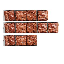

In [8]:
from keras.preprocessing import image

test_image = image.load_img('/content/drive/My Drive/Colab Notebooks/CNN Homework/classify/img1.jpg', target_size = (64, 64))
test_image

In [9]:
test_image = np.array(test_image)/255.0
test_image.shape

(64, 64, 3)

In [10]:
result = classifier.predict(test_image[np.newaxis, :])
result

array([[3.5915735e-09]], dtype=float32)

In [10]:
training_set.class_indices

{'A': 0, 'B': 1}

In [0]:
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Alert!'
else:
    prediction = 'Acceptable, continue.'

Text(0.5, 1.0, 'Prediction: Acceptable, continue.')

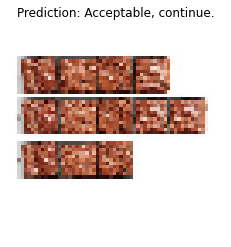

In [12]:
plt.imshow(test_image)
plt.axis('off')
plt.title("Prediction: " + prediction)